In [21]:
#@title Install and Import Dependencies

# this assumes that you have a relevant version of PyTorch installed
%pip install -q torchaudio

SAMPLING_RATE = 16000

import torch
torch.set_num_threads(12)

from IPython.display import Audio
from pprint import pprint

Note: you may need to restart the kernel to use updated packages.


In [2]:
USE_ONNX = True # change this to True if you want to test onnx model
if USE_ONNX:
    !pip install -q onnxruntime

model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True,
                              onnx=USE_ONNX)

(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /Users/kevin/.cache/torch/hub/master.zip
2023-10-12 23:02:42.845522 [W:onnxruntime:, graph.cc:3553 CleanUnusedInitializersAndNodeArgs] Removing initializer '628'. It is not used by any node and should be removed from the model.
2023-10-12 23:02:42.845536 [W:onnxruntime:, graph.cc:3553 CleanUnusedInitializersAndNodeArgs] Removing initializer '629'. It is not used by any node and should be removed from the model.
2023-10-12 23:02:42.845542 [W:onnxruntime:, graph.cc:3553 CleanUnusedInitializersAndNodeArgs] Removing initializer '623'. It is not used by any node and should be removed from the model.
2023-10-12 23:02:42.845547 [W:onnxruntime:, graph.cc:3553 CleanUnusedInitializersAndNodeArgs] Removing initializer '625'. It is not used by any node and should be removed from the model.
2023-10-12 23:02:42.845552 [W:onnxruntime:, graph.cc:3553 CleanUnusedInitializersAndNodeArgs] Removing initializer '620'. It is not used by

## Full Audio

**Speech timestapms from full audio**

In [3]:
wav = read_audio('wav/buhjuqwms.wav', sampling_rate=SAMPLING_RATE)
# get speech timestamps from full audio file
speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=SAMPLING_RATE, max_speech_duration_s=10)
pprint(speech_timestamps)

[{'end': 56288, 'start': 2080},
 {'end': 224000, 'start': 64544},
 {'end': 316896, 'start': 224000},
 {'end': 388608, 'start': 319520}]


In [4]:
print(len(speech_timestamps))

4


In [5]:
# merge all speech chunks to one audio
first_chunk = speech_timestamps[3]
save_audio('only_speech.wav',
           wav[first_chunk["start"]:first_chunk["end"]], sampling_rate=SAMPLING_RATE)
Audio('only_speech.wav')

# Real work

  0%|          | 0/2509 [00:00<?, ?it/s]

Total hours of audio: 438.08461277611116


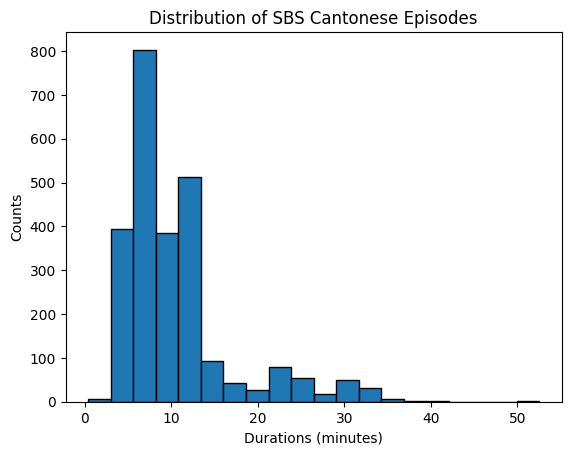

In [17]:
import glob
import subprocess
from tqdm.contrib.concurrent import thread_map
import matplotlib.pyplot as plt

# def get_duration_seconds(file_path):
#     audio = AudioSegment.from_mp3(file_path)
#     duration = len(audio) / 1000  # pydub calculates in millisec
#     return duration

def get_duration_seconds(file_path):
    cmd = ["ffprobe", "-i", file_path, "-show_entries", "format=duration", "-v", "quiet", "-of", "csv=p=0"]
    output = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout
    return float(output)

durations = thread_map(get_duration_seconds, sorted(glob.glob("audio/*.mp3")))
print(f"Total hours of audio: {sum(durations) / 60 / 60}")
# Plotting the distribution
plt.hist([seconds/60 for seconds in durations], bins=20, edgecolor='black')
plt.title('Distribution of SBS Cantonese Episodes')
plt.xlabel('Durations (minutes)')
plt.ylabel('Counts')
plt.show()

In [9]:
import glob
import subprocess
from pathlib import Path
import json
from tqdm.contrib.concurrent import thread_map
import os

def generate_timestamp(audio_file):
    audio_name = Path(audio_file).stem.removesuffix(".mp3")
    cmd = ["ffmpeg", "-y", "-i", f"audio/{audio_name}.mp3", "-ar", "16000", f'{audio_name}.wav']
    subprocess.run(cmd, capture_output=True)
    wav = read_audio(f'{audio_name}.wav', sampling_rate=SAMPLING_RATE)
    speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=SAMPLING_RATE, max_speech_duration_s=10)
    with open(f"timestamps/{audio_name}.json", "w+") as output_file:
        json.dump(speech_timestamps, output_file)
    os.remove(f'{audio_name}.wav')

thread_map(generate_timestamp, sorted(glob.glob("audio/*.mp3")))

  0%|          | 0/2509 [00:00<?, ?it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Show segment statistics

Total hours: 435.4031503133115
Average duration of one segment: 8.283925995291096
Median duration of one segment: 9.952


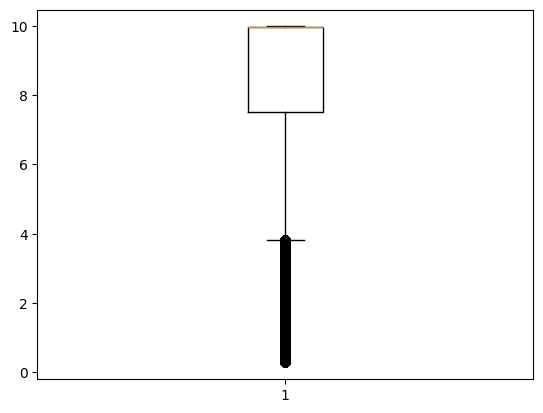

Q1: 7.502
Q3: 9.952
Lower bound: 3.8269999999999995


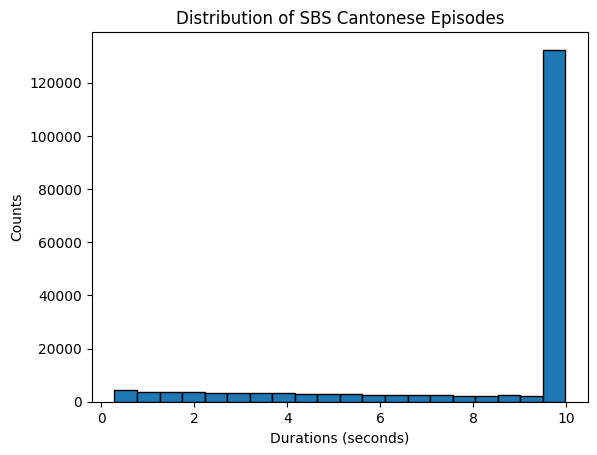

In [22]:
import glob
import json
import matplotlib.pyplot as plt
import statistics

durations = []

for file in sorted(glob.glob("timestamps/*.json")):
    with open(file) as json_file:
        timestamps = json.load(json_file)
        for timestamp in timestamps:
            durations.append((timestamp["end"] - timestamp["start"]) / SAMPLING_RATE)

print(f"Total hours: {sum(durations) / 3600}")
print(f"Average duration of one segment: {statistics.mean(durations)}")
print(f"Median duration of one segment: {statistics.median(durations)}")

plt.boxplot(durations)
plt.show()

def lower_whisker(data):
    # Calculate Q1 and Q3
    quantiles = statistics.quantiles(data)
    Q3 = quantiles[2]
    Q1 = quantiles[0]

    # Calculate IQR
    IQR = Q3 - Q1

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")

    # Calculate the lower whisker
    whisker = Q1 - 1.5 * IQR
    return whisker

lower_bound = lower_whisker(durations)
print(f"Lower bound: {lower_bound}")

# Plotting the distribution
plt.hist(durations, bins=20, edgecolor='black')
plt.title('Distribution of SBS Cantonese Episodes')
plt.xlabel('Durations (seconds)')
plt.ylabel('Counts')
plt.show()


# Output segments as FLAC

In [18]:
from pathlib import Path
import glob
import json
from pydub import AudioSegment
from tqdm import tqdm

# Output folder for the segmented FLAC files
output_folder = "segments/"

# Create the output folder if it doesn't exist
Path(output_folder).mkdir(parents=True, exist_ok=True)

for file in tqdm(sorted(glob.glob("timestamps/*.json"))):
    with open(file) as json_file:
        timestamps = json.load(json_file)
        audio_name = Path(file).stem.removesuffix(".json")

        # Load the MP3 audio file
        audio = AudioSegment.from_mp3(f"audio/{audio_name}.mp3")

        # Configure audio segment based on sample rate, sample width, and channels
        sample_width = 2  # sample width in bytes (e.g., 16-bit audio)
        channels = 1 # 1 for mono

        audio = audio.set_sample_width(sample_width)
        audio = audio.set_channels(channels)
        audio = audio.set_frame_rate(SAMPLING_RATE)

        for i, timestamp in enumerate(timestamps):
            start_sample, end_sample = timestamp['start'], timestamp['end']

            # pydub works in milliseconds
            segment = audio[(start_sample/SAMPLING_RATE*1000):(end_sample/SAMPLING_RATE*1000)]

            # Define the output filename (e.g., segment_0.flac, segment_1.flac, etc.)
            output_filename = f"{output_folder}{audio_name}_{str(i).zfill(4)}_{start_sample}_{end_sample}.flac"

            # Export the segment as a FLAC file
            segment.export(output_filename, format="flac")

100%|██████████| 2509/2509 [4:06:49<00:00,  5.90s/it]  


# Group segments by categories

In [8]:
categories = [
    ("interview", "title", "我不是名人"),
    ("career", "title", "澳洲招職"),
    ("expert", "title", "專家話你知"),
    ("vaccine", "title", "疫苗快報"),
    ("english", "title", "SBS學英語"),
    
    ("culture", "view_more_link", "podcast-episode/culture-360"),

    ("food", "download_link", "awCollectionId=gourmet-express"),
    ("gardening", "download_link", "awCollectionId=gardening-tip"),
    ("business", "download_link", "awGenre=Business"),
    ("tech", "download_link", "awGenre=Technology"),
    ("health", "download_link", "awGenre=Health"),
    
    ("news_update", "view_more_link", "sbs-news-update"),
    ("news", "view_more_link", "chinese-news"),
    
    # fall-back category
    ("news_other", "title", ""),
]

import json
from collections import defaultdict

segments_by_category = defaultdict(list)

with open("metadata.jsonl", "r") as data_file:
    lines = data_file.readlines()
    print("Total audios:", len(lines)) 
    for i, line in enumerate(lines):
        data = json.loads(line)
        view_more_link = data.get("view_more_link", "")
        id = view_more_link.split("/")[-1]
        for (category, field, pattern) in categories:
            value = data.get(field, "")
            if pattern in value:
                segments_by_category[category].append(id)
                break

for category, ids in sorted(segments_by_category.items(), key=lambda x: len(x[1]), reverse=True):
    print(f"{category}: {len(ids)}")

print("Uncategorized audios:", len(lines) - sum([len(ids) for ids in segments_by_category.values()]))

Total audios: 2519
news_other: 1328
news: 327
news_update: 295
business: 148
vaccine: 71
gardening: 58
tech: 56
health: 53
culture: 49
english: 41
expert: 37
interview: 20
career: 18
food: 18
Uncategorized audios: 0


In [19]:
import json
from collections import defaultdict
from dateutil.parser import parse

segments_by_date = defaultdict(list)

with open("metadata.jsonl", "r") as data_file:
    lines = data_file.readlines()
    for line in lines:
        data = json.loads(line)
        view_more_link = data.get("view_more_link", "")
        id = view_more_link.split("/")[-1]

        date = parse(data.get("date"), dayfirst=True, yearfirst=False)
        segments_by_date[date].append(id)

for date, ids in sorted(segments_by_date.items(), key=lambda x: x[0]):
    print(f"{date}: {len(ids)}")

print(len(segments_by_date.keys()))

print("Uncategorized audios:", len(lines) - sum([len(ids) for ids in segments_by_date.values()]))

2022-08-12 00:00:00: 1
2022-08-23 00:00:00: 3
2022-08-24 00:00:00: 10
2022-08-25 00:00:00: 8
2022-08-26 00:00:00: 7
2022-08-27 00:00:00: 4
2022-08-28 00:00:00: 3
2022-08-29 00:00:00: 7
2022-08-30 00:00:00: 9
2022-08-31 00:00:00: 8
2022-09-01 00:00:00: 11
2022-09-02 00:00:00: 8
2022-09-03 00:00:00: 3
2022-09-04 00:00:00: 4
2022-09-05 00:00:00: 7
2022-09-06 00:00:00: 8
2022-09-07 00:00:00: 8
2022-09-08 00:00:00: 12
2022-09-09 00:00:00: 6
2022-09-10 00:00:00: 3
2022-09-11 00:00:00: 3
2022-09-12 00:00:00: 6
2022-09-13 00:00:00: 10
2022-09-14 00:00:00: 8
2022-09-15 00:00:00: 9
2022-09-16 00:00:00: 8
2022-09-17 00:00:00: 4
2022-09-18 00:00:00: 3
2022-09-19 00:00:00: 6
2022-09-20 00:00:00: 8
2022-09-21 00:00:00: 10
2022-09-22 00:00:00: 11
2022-09-23 00:00:00: 8
2022-09-24 00:00:00: 4
2022-09-25 00:00:00: 2
2022-09-26 00:00:00: 6
2022-09-27 00:00:00: 9
2022-09-28 00:00:00: 7
2022-09-29 00:00:00: 11
2022-09-30 00:00:00: 7
2022-10-01 00:00:00: 3
2022-10-02 00:00:00: 4
2022-10-03 00:00:00: 9
2022

# Upload to Hub

In [16]:
import os
import tarfile
from tqdm import tqdm

# Input folder containing FLAC files
input_folder = 'segments'

# Output folder for the tar.gz chunks
output_folder = '/Users/kevin/Downloads/archive'

# Maximum size for each tar.gz chunk (2GB in bytes)
max_chunk_size = 2 * 1024 * 1024 * 1024

def create_tar_chunk(input_files, chunk_number):
    # Create a tar.gz file for the chunk
    chunk_filename = os.path.join(output_folder, f'audio_{str(chunk_number).zfill(4)}.tar.gz')
    with tarfile.open(chunk_filename, 'w:gz') as tar:
        for file in input_files:
            tar.add(file, arcname=os.path.relpath(file, input_folder))

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all FLAC files in the input folder
flac_files = sorted([os.path.join(dp, f) for dp, dn, filenames in os.walk(input_folder) for f in filenames if f.endswith('.flac')])

# Initialize variables
current_chunk = []
current_chunk_size = 0
chunk_number = 1

for flac_file in tqdm(flac_files):
    # Get the size of the FLAC file
    file_size = os.path.getsize(flac_file)

    # If adding the file to the current chunk doesn't exceed the max size
    if current_chunk_size + file_size <= max_chunk_size:
        current_chunk.append(flac_file)
        current_chunk_size += file_size
    else:
        # Create a new chunk
        create_tar_chunk(current_chunk, chunk_number)

        # Reset variables for the new chunk
        current_chunk = [flac_file]
        current_chunk_size = file_size
        chunk_number += 1

# Create the last chunk if there are remaining files
if current_chunk:
    create_tar_chunk(current_chunk, chunk_number)


100%|██████████| 189216/189216 [11:37<00:00, 271.28it/s] 


In [17]:
from huggingface_hub import login
login(token="xxx")

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /Users/kevin/.cache/huggingface/token
Login successful


In [18]:
from huggingface_hub import HfApi
api = HfApi()

api.upload_folder(
    folder_path="/Users/kevin/Downloads/archive",
    repo_id="AlienKevin/sbs_cantonese",
    repo_type="dataset",
    path_in_repo="audio",
    multi_commits=True,
    multi_commits_verbose=True,
)

/Users/kevin/miniconda3/lib/python3.11/site-packages/huggingface_hub/utils/_experimental.py:57: UserWarning: 'plan_multi_commits' is experimental and might be subject to breaking changes in the future. You can disable this warning by setting `HF_HUB_DISABLE_EXPERIMENTAL_WARNING=1` as environment variable.
  warnings.warn(
/Users/kevin/miniconda3/lib/python3.11/site-packages/huggingface_hub/utils/_experimental.py:57: UserWarning: 'HfApi.create_commits_on_pr' is experimental and might be subject to breaking changes in the future. You can disable this warning by setting `HF_HUB_DISABLE_EXPERIMENTAL_WARNING=1` as environment variable.
  warnings.warn(
Will create 0 deletion commit(s) and 15 addition commit(s), totalling 16 atomic operations.
Multi-commits strategy with ID 14ab7e736c0bafc005b683b7a2f7fe10f381b205a9490023411e46ab4cc2bae5.
New PR created: https://huggingface.co/datasets/AlienKevin/sbs_cantonese/discussions/16


audio_0001.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step 39e9cbf267fe491e31d931289b91bc41626b99f458c6ac0c4b054a182e66755d completed (still 14 to go).


audio_0002.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step b27e4b640998b2e48f22789b0b70c4f386a12822b67f17b50a1233933c136228 completed (still 13 to go).


audio_0003.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step ec49f9af800fc58b34852a165af5b1507dfdf4690658cc83d681967acafa2c59 completed (still 12 to go).


audio_0004.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step 122f34c33a78f3fcc708b18644b1d61a3b4642fb8bc26671c59693c5946e4847 completed (still 11 to go).


audio_0005.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step aed61d325b49fe821cd64b91c5229054504f23ce809d1b00b86d7d98531caf47 completed (still 10 to go).


audio_0006.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step a0aa8445f1f40a3a5fffba697032cbe46a502defe756f0279e1d2ed36cb879ad completed (still 9 to go).


audio_0007.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step 8a0ebb4ba79f2e0c78cf6e61a9bae2e82ee3dc267ff32f815db806dcf0307aba completed (still 8 to go).


audio_0008.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step a89722accb37ea84da0328369b5341ac34f2263429c15013aaaf95e0ab7f6e10 completed (still 7 to go).


audio_0009.tar.gz:   0%|          | 0.00/2.05G [00:00<?, ?B/s]

  step caa8bf504cf8805f14614ef4d761ae5fd2f0e00d45349702635e3c93f9b5f5cb completed (still 6 to go).


audio_0010.tar.gz:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

  step 2e35ade2d2292f400abe26023e31a3a60a964fc1fca6397eb4626093d5e58b25 completed (still 5 to go).


audio_0011.tar.gz:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

  step 6adcfe8448f0cef06bc573dbebf15313adba0fac13d9c53936cf2ce17efa60aa completed (still 4 to go).


audio_0012.tar.gz:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

  step 965ddfd3c69f62c861f7b1a8b73b5746d3fdb41a01bba275a28cf4b9fa0375da completed (still 3 to go).


audio_0013.tar.gz:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

  step daab153474f727f6fe23788043ba16d1a89be8f314495506a6ccd80078e013ed completed (still 2 to go).


audio_0014.tar.gz:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

  step 8ad2cd4a9a01f9bf1565bd206841dc38a53ec3e6efdfd15d59d693be9ece6274 completed (still 1 to go).


audio_0015.tar.gz:   0%|          | 0.00/1.31G [00:00<?, ?B/s]

  step 6d17a3a0388e5bdb995bcbe3ea5cd34d09f02ab6d99690ec294efaeb892160b7 completed (still 0 to go).
All commits have been pushed.
PR is now open for reviews.
PR has been automatically merged (`merge_pr=True` was passed).


'https://huggingface.co/datasets/AlienKevin/sbs_cantonese/tree/main/audio'